Get the data on fragments of glass
collected in forensic work from the book website.
Estimate the density of the first variable
(refractive index) using a histogram and
a kernel density estimator.
Use cross-validation to choose the amount of smoothing.
Experiment with different binwidths and bandwiths.
Comment on the similarities and differences.
Construct 95 percent confidence bands for your estimators.

The data may be found at https://www.stat.cmu.edu/~larry/all-of-statistics/=data/glass.dat

In [121]:
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [122]:
# Read the data into a pandas data frame
glass_df = pd.read_csv('../data/glass_clean.dat', sep='\t')

# Transform the single dataframe column into a numpy array
glass_data = glass_df['RI'].to_numpy()

Here we perform kernel density estimation using the Fast Fourier Transform for a *single* given bandwidth
(in other words we do *not* compute the approximation of the cross-validation risk estimate here).

In [123]:
def kde_fft(data, h, J=None):
    
    # Gaussian Kernel
    K = scipy.stats.norm.pdf
    
    # Fix the period
    buffer_ratio = 1.1 # Make sure the data points at the min & max do not influence each other once periodized
    T = (data.max() - data.min())*buffer_ratio
    
    # B*T = 2**J, where B is the bandwidth
    if J is None:
        # Ensure that 1/B < h/4
        J = 2 + np.ceil(np.log2(T/(h))).astype(np.int64)

    # Evalute Y_j [k]
    data_mesh, k_mesh = np.meshgrid(data, range(2**J))
    Y = (
        np.sqrt(2*np.pi)/T
        *K(2*np.pi*h*k_mesh/T)
        *np.exp(2*np.pi*1j*data_mesh*k_mesh/T)
    )

    # Evalute \hat f_n [k]
    fhat = Y.mean(axis=1)
    
    # For plotting later
    k_arr = range(2**J)/T
    
    B = 2**J/T
    x_arr = range(2**J)/B
    x_arr += data.min()*buffer_ratio
    x_shift_index = np.abs(x_arr).argmin()

    # Inversion
    f = np.real(np.fft.fft(fhat))
    f = np.roll(f, x_shift_index)
    
    return J, T, B, k_arr, x_arr, fhat, f

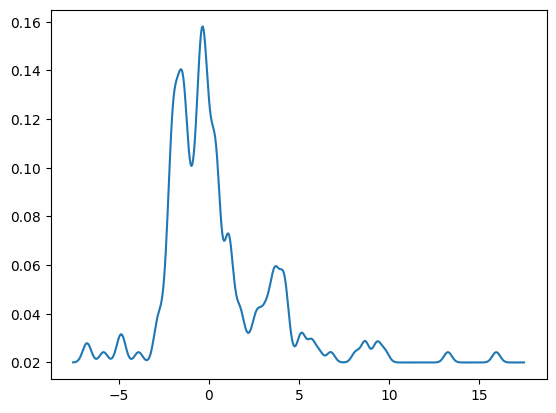

In [129]:
# Glass data
J, T, B, k_arr, x_arr, fhat, f = kde_fft(glass_data, h=0.22, J=None)

plt.plot(x_arr, f, label='Kernel density estimator')
plt.show()
plt.close()